In [3]:
from IPython.display import Image

### Model kamery perspektywicznej (pinhole camera model)

Najprostszym modelem kamery opisującym matematyczną zależność rzutowania punktów z przestrzeni trójwymiarowej na płaszczyznę obrazu jest model kamery punktowej (pinhole camera). Rysunek przedstawia geometrię tej kamery. Do jej opisu stosuje się parametry: oś optyczną (ang. principal axis, prostopadła oś do osi symetrii soczewki), ognisko (focal point, punkt skupienia załamanych promieni słonecznych), punkt główny kamery (ang. principal point, punkt przecięcia osi optycznej z płaszczyzną obrazu), ogniskową (ang. focal length, odległość między ogniskiem a punktem głównym kamery), płaszczyznę główną kamery (płaszczyzna przechodząca przez środek, równoległa do płaszczyzny obrazu) oraz centrum optyczne (inaczej centrum kamery; ang. camera centre, środek projekcji, umieszczony w początku układu współrzędnych). 

W rzeczywistości obraz powstały na płaszczyźnie obrazu lub siatkówce ludzkiego oka wydaje się być odwrócony. Jednakże w celu uproszczenia obliczeń przyjęto, że płaszczyzna ogniskowa zdefiniowana jest pomiędzy obiektem a początkiem układu współrzędnych. Przyjęto, że środek kamery C jest początkiem euklidesowego układu współrzędnych, a płaszczyzna Z = f jest płaszczyzną obrazu. Korzystając z podobieństwa trójkątów możliwe jest zmapowanie punktu P w przestrzeni trójwymiarowej do punktu p na płaszczyźnie obrazu. 

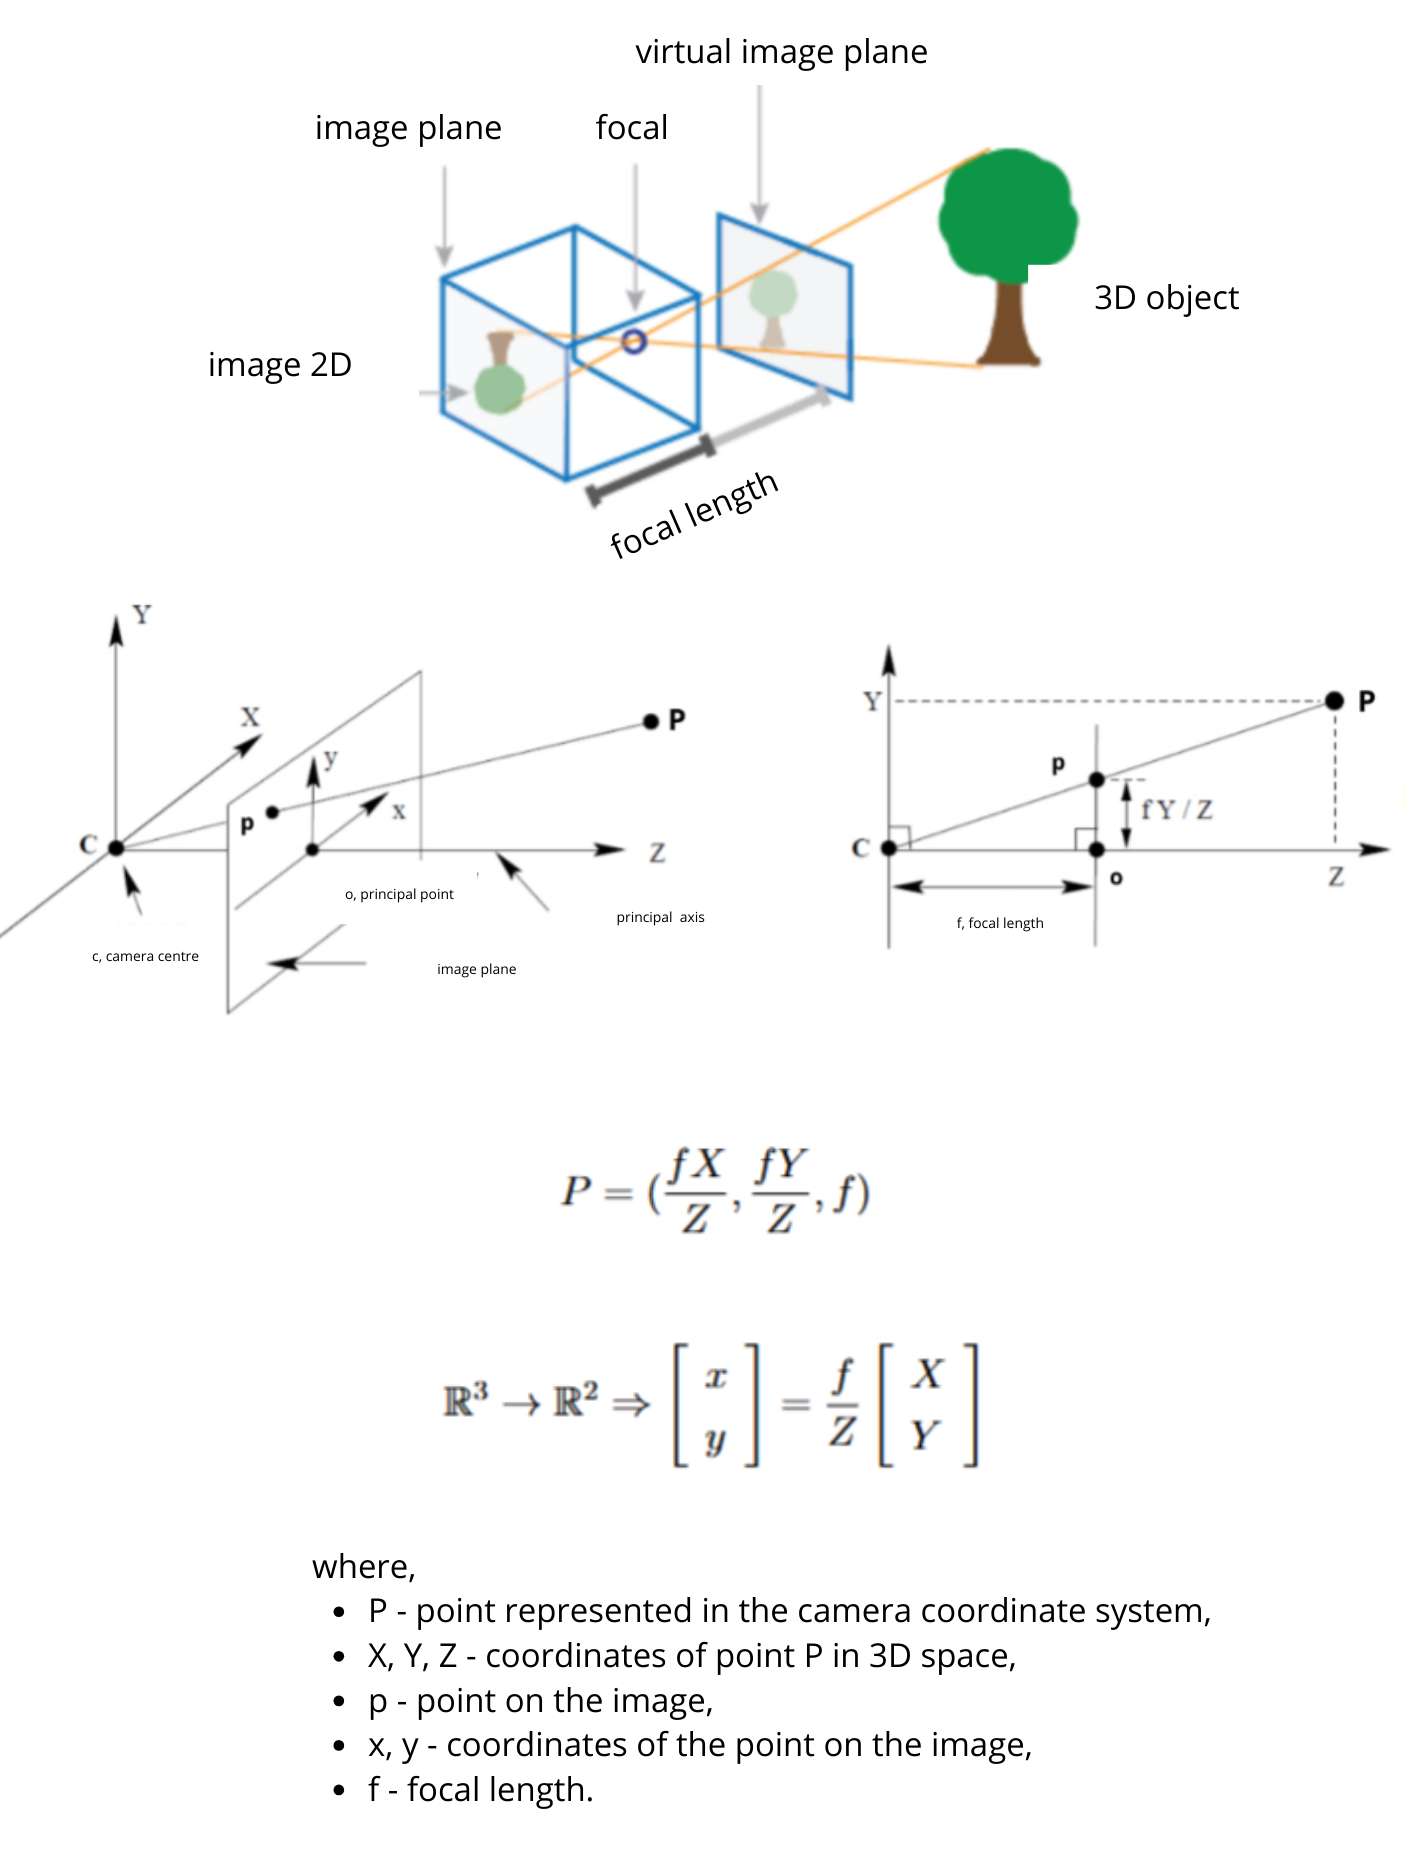

In [18]:
Image(filename=".././images/2_0.png", width=800)

### Kalibracja kamery

Kalibracja kamery to proces określenia jej parametrów wewnętrznych i zewnętrznych, które pozwalają na dokładne odwzorowanie trójwymiarowych punktów sceny na dwuwymiarową płaszczyznę obrazu. Jets to kluczowych etap podczas pracy z danymi z czujników, gdyż pozwala skorygować zniekształcenia optyczne a także określić relacje przestrzenne kamery i układu odniesienia świata. 

Estymowane parametry kamery można podzielić na dwie grupy:
- parametry wewnętrzne (intrinsic parameters) K - opisują właściwości optyki i matrycy kamery
    - ogniskowa fx i fy (focal length) - może być również opisana przez parametr m opisujący różnicę skali pomiędzy x i y na podstawie chipa w czujniku kamery.
    - punktu główny cx i cy (optical center)
    - współczynnik ukośności piksela s (screw ratio)
- parametry zewnętrzne (extrinsic parameters) W - określają pozycje i orientację kamery w przestrzenii
    - macierz rotacji R
    - wektor translacji T
- współczynniki dystorsji optycznej: k1,k2, p1, p2, k3


Celem kalibracji jest zatem wyznaczenie wartości 11 nieznanych parametrów: 6 parametrów zewnętrznych (3 kąty z macierzy rotacji, 3 przesunięcia z wektora translacji) oraz 5 parametry wewnętrzne (fx,fy,cx,cy, s). Jednakże parametry wewnętrznie pozostają niezmienne pomiędzy różnymi widokami tej samej sceny z różnych kątów. Jeśłi dodatkowo uwzględniamy zniekształcenia soczewki, liczba nieznanych parametrów wzrasta do 16.

W wyniku kalkulacji każdy widok ustala 8 parametrów: 6 zmiennych parametrów zewnętrznych (rotacja i translacja) oraz 2 dodatkowe, których następnie używamy do rozwiązania macierzy parametrów wewnętrznych. A więc potrzebujemy co najmniej 3 zdjęć aby móc obliczyć wartości wszystkich 11 nieznanych parametrów.


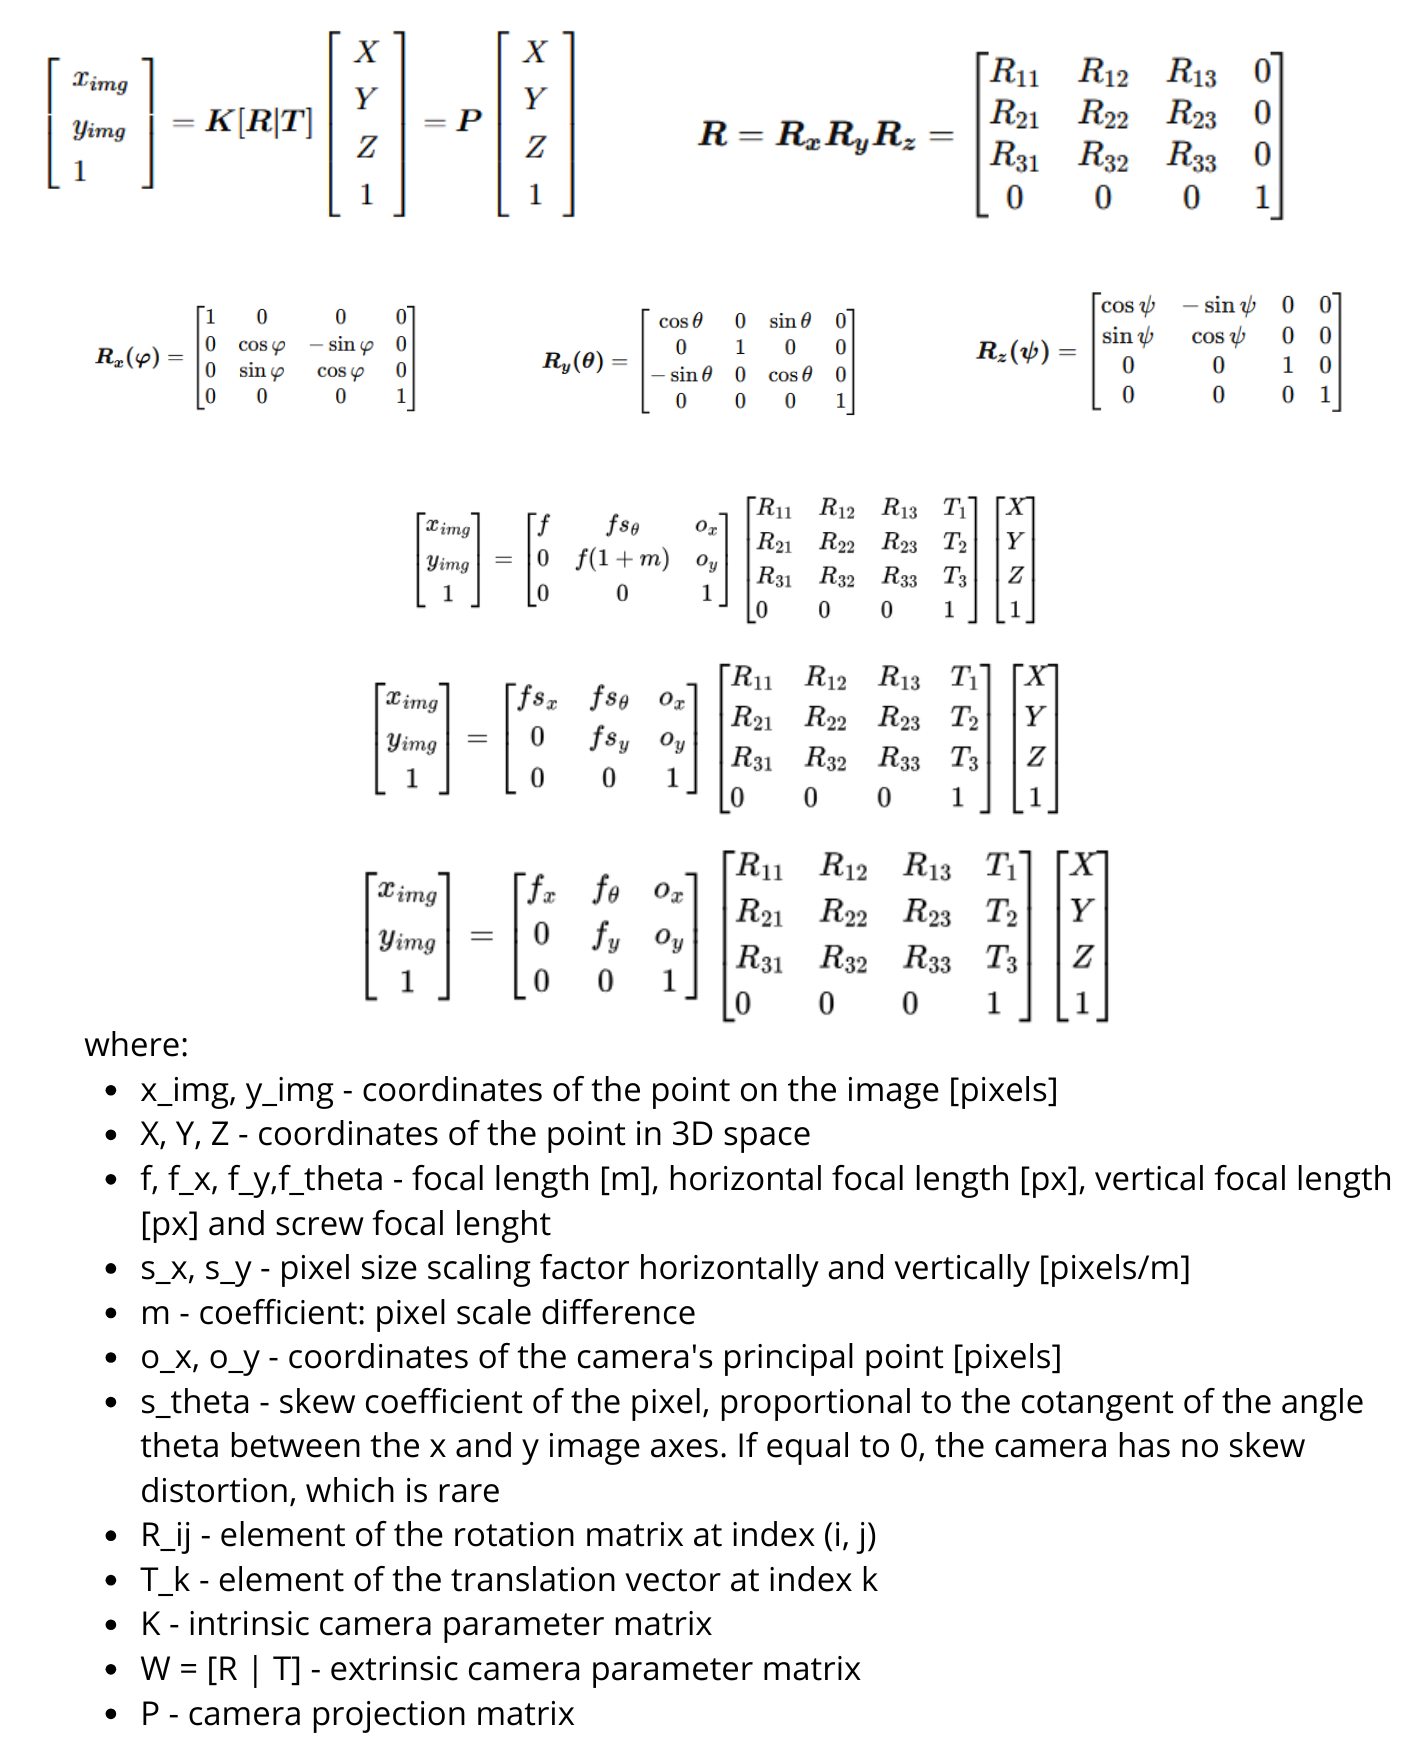

In [19]:
Image(filename=".././images/2_1.png", width=600)

### Współrzędne jednorodne - homogeus coordinates

W trakcie obliczeń zwykłe współrzędne zamienia się na współrzędne jednorodne, ponieważ ułątwiają one reprezentację oraz obliczenia transformacji geometrycznych, zwłaszcza perspektywicznych. Dzięki temu macierze mają spójne wymiary i możliwe jest wykonywanie obliczeń macierzowych np. mnożeń itd.

W praktyce polega to na dodaniu dodatkowego wymiaru do standardowych współrzędnych kartezjańskich. Dodatkową zaletą jest tworzenie puktów w nieskończoności - ich ostatnia współrzędna jest równa 0. 

Jeśli chcemy powrócić do współrzędnych kartezjańskich wystarczy podzielić wszystkie współrzędne przez ostatnią. 

Kolejną cechą jest to, że współrzędne jednorodne można skalować dowolnym, niezerowym czynnikiem skali i one nadal będą reprezentowały ten sam punkt. Oznacza to, że mimo, że macierz ma wymiar np. 3x3 = 9 elementów to tak naprawdę ma 8 stopni swobody, gdyż jeden utraciła przez niejednoznaczność skali. 

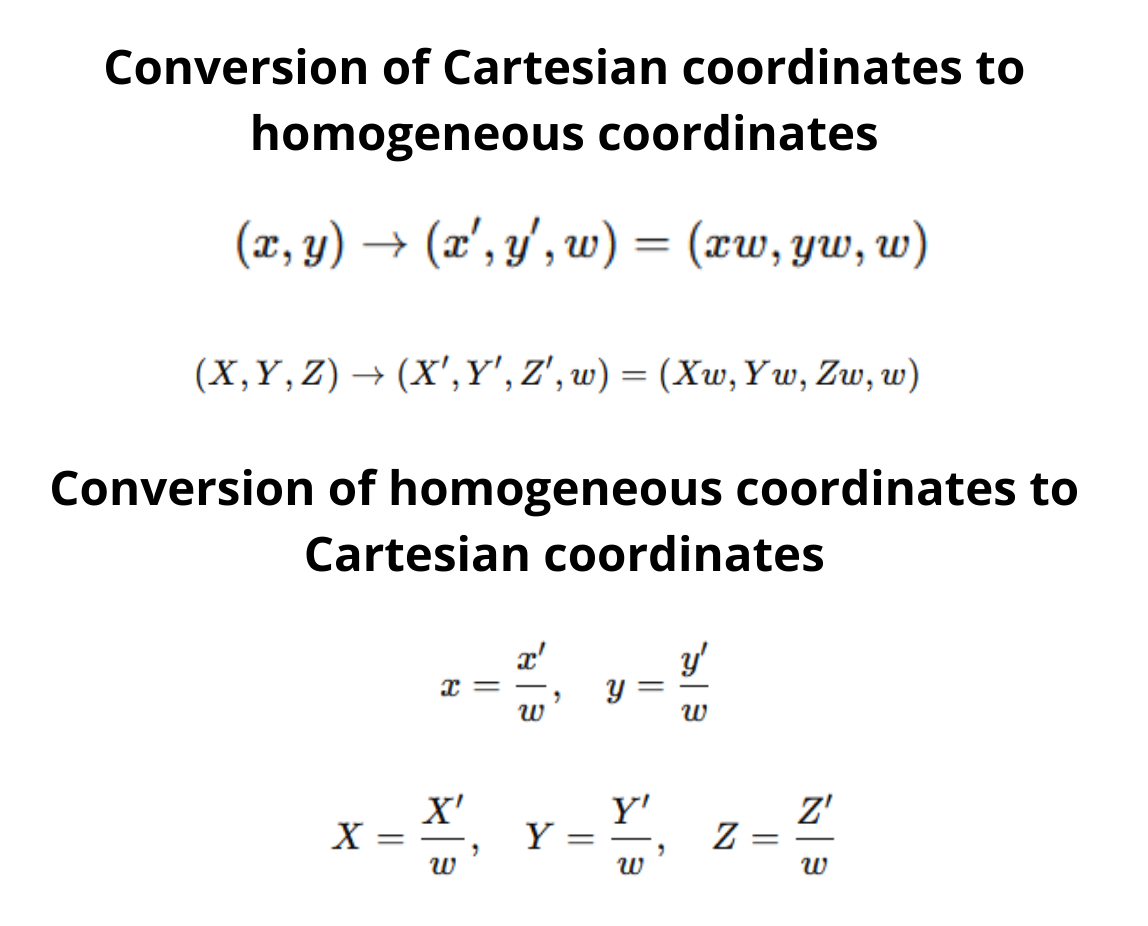

In [10]:
# source: https://pvphan.com/camera-calibration-1 
Image(filename=".././images/2_2.png", width=400)

### Jak wygląda w praktyce wyznaczenie pozycji obiektu 3D na obrazie - krok po kroku?

Do wyznaczania pozycji 3D obiektu potrzebne są zarówno macierze parametrów wewnętrznych kamer, jak i macierze rotacji i translacji.   Macierz parametrów zewnętrznych [R | T] to złożenie macierzy rotacji i translacji, która konwertuje punkty z układu współrzędnych układu odniesienia świata (3D) do układu współrzędnych kamery (3D). Wyznaczona macierz parametrów wewnętrznych K danego urządzenia uwzględnia liniową transformację perspektywiczną oraz parametry fizyczne macierzy pikseli. W pierwszej kolejności zapewnia ona transformację z układu współrzędnych kamery (3D) do układu współrzędnych obrazu (2D), innymi słowy odpowiada za projekcie punktów 3D do na "znormalizowaną płaszczyznę kamery" gdzie z = 1 (dzielimy współrzędne x i y przez z). Następnie dzięki obliczonym współczynnikom zniekształcenia obraz jest odzniekształcany. W ostatnim kroku te przeprocesowane punkty 2D są rzutowane do układu współrzędnych pikseli (2D). 

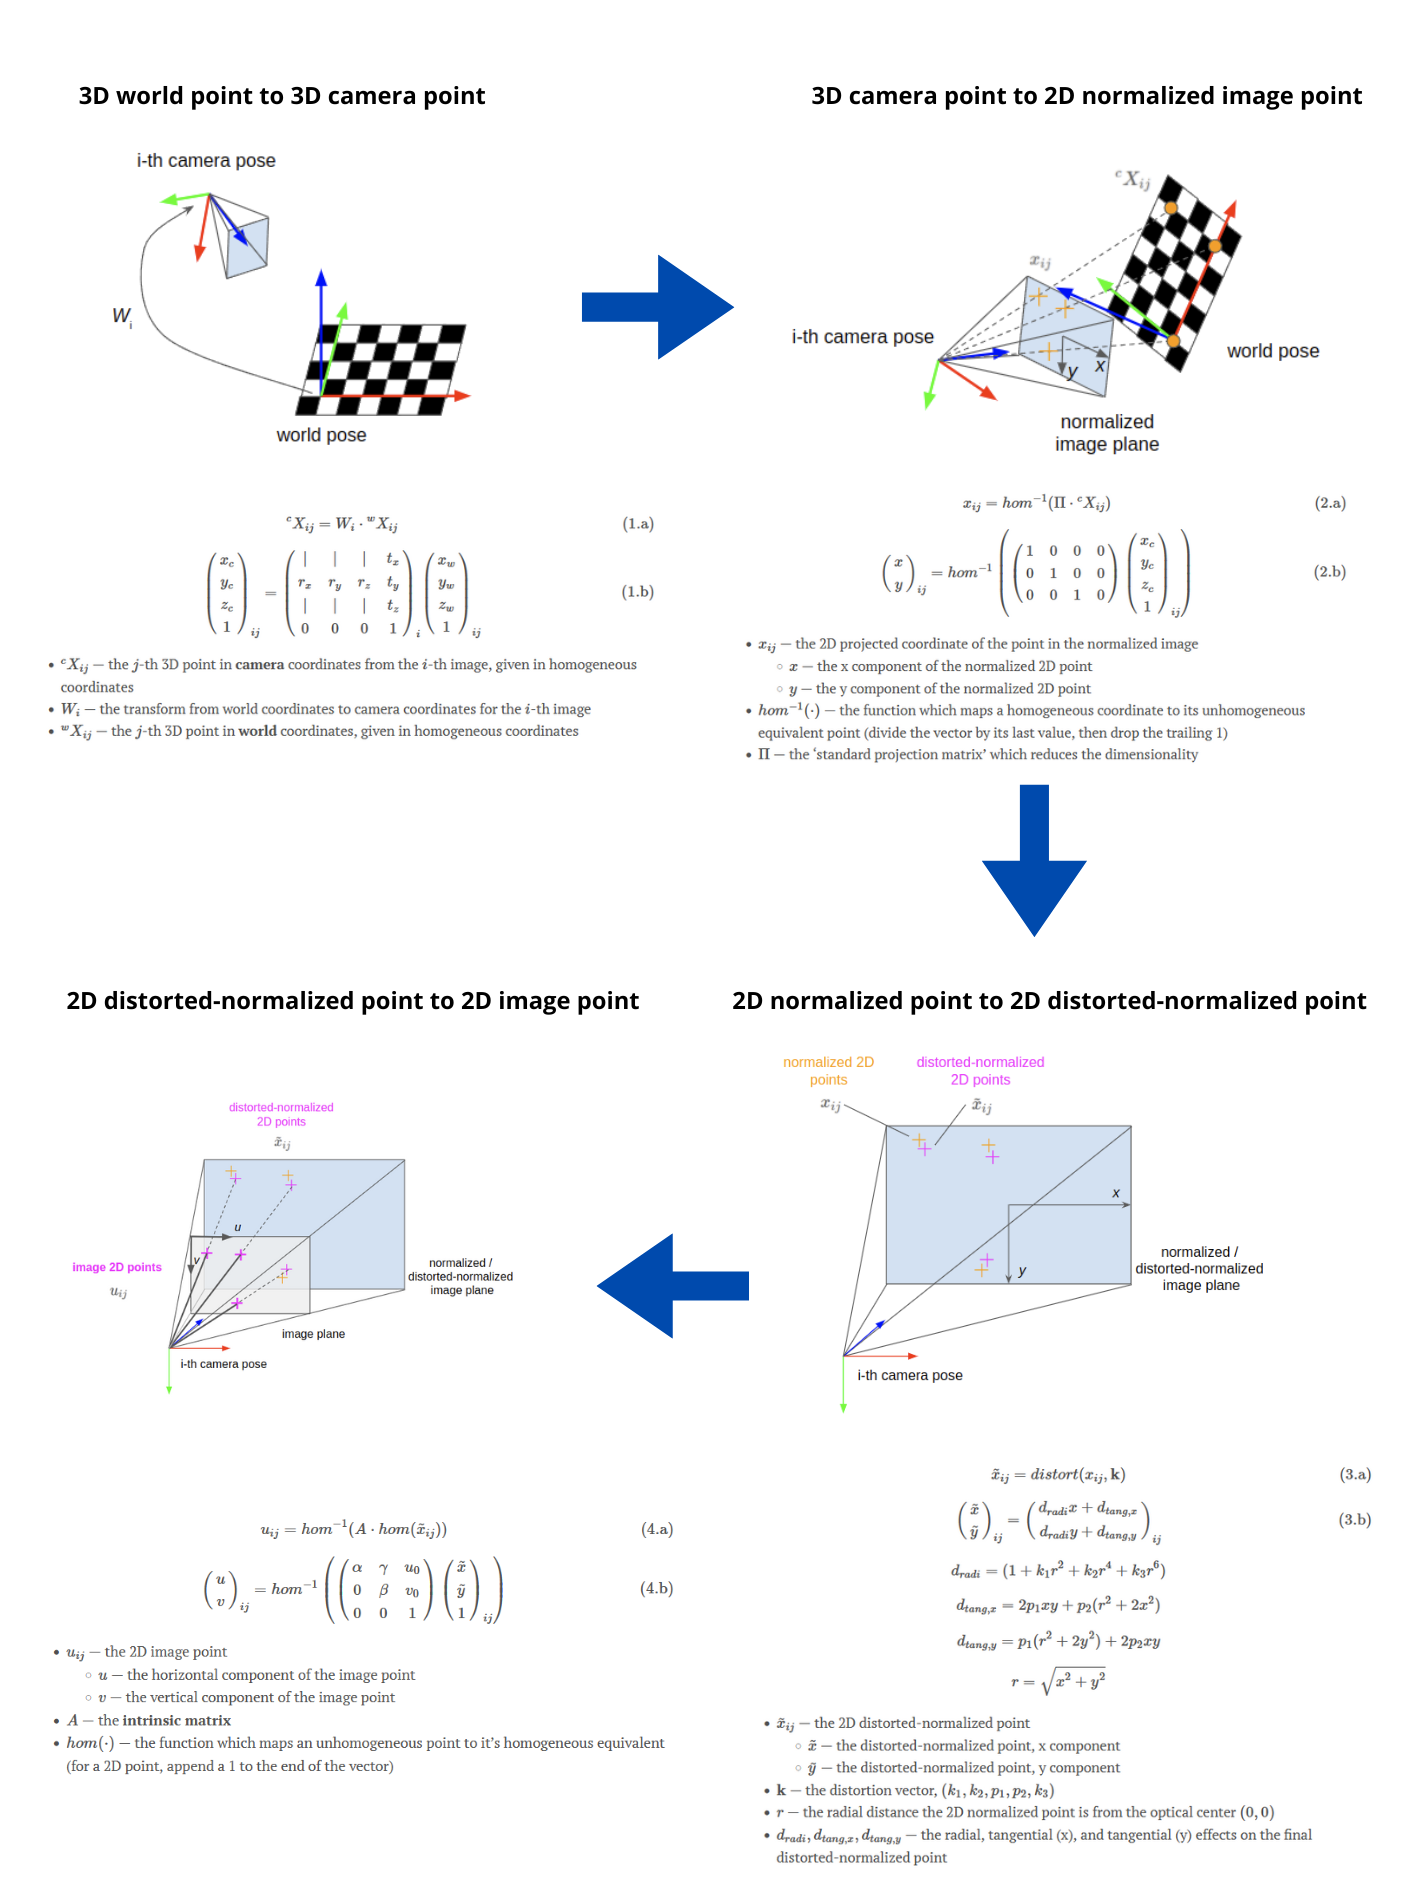

In [11]:
# source: https://pvphan.com/camera-calibration-1 
Image(filename=".././images/2_3.png", width=900)

### Jak wygląda procedura kalibracji?

Procedura składa się z kilku poniższych kroków:

- przygotowanie wzorca kalibracyjnego - najczęściej jest to szachownica lub szachownica z kodami aruco o znanych wymiarach rzeczywistych pól. Możesz ja wydrukować na zwykłym papierze. Dla poprawnego przebiegu kalibracji należy zadbać, żeby szachownica miała odpowiednie białe pole ochronne wokół, była wydrukowana na grubszym papierze matowym lub najlepiej twardej pokładce - żeby zadbać, że wszystkie punkty są współpłaszczyznowe. 
- zrobienie zdjęć kalibracyjnych - należy unieruchomieć kamerę oraz zrobić wiele zdjęć, najlepiej 13-17, przedstawiających pełny wzór szachownicy z różnych kątów i odległości.  Ważne, żeby szachownica nie była przycięta, bo algorytm nie będzie w stanie poprawnie wykryć narożników.
- detekcja narożników - jako, że szachownica jest znanych wzorcem możliwe jest wykrycie położenia narożników na obrazie 2D. Następnie w celu poprawy dokładności można zastosować metodę, która poprawia położenie tych narożników.
- obliczenie nieznanych parametrów kalibracyjnych - w tym celu należy zastosować metodę Zhanga lub funkcję z biblioteki OpenCV. Danymi wejściowymi są: wykryte położenia narożników 2D oraz położenia narożników w 3D, w rzeczywistości na podstawie znanych wymiarów pola szachownicy (założenie, że środek układu współrzędnych jest w lewym, górnym narożniku szachownicy oraz, że wszystkie punkty szachownicy leżą na jednej płaszczyźnie. Osie układu współrzędnych są przyczepione do płaszczyzny szachownicy. Finalnie, współrzędne szachownicy można wyrazić kolejno jako, zakładając wymiary pola jako 0.05m x 0.05m((0,0,0), 0.05, 0, 0), (0.1, 0, 0), (0.15, 0, 0), (0.2, 0, 0); (0, -0.05,0) (0.05, - 0.05, 0), (0.1, - 0.05, 0), (0.15, - 0.05, 0), (0.2, 0 - 0.05, 0),) 
    - Direct Linear Transformation oblicza 11 niewiadomych i jest użyteczne jeśli punkty kontrolne nie leżą na jednej płaszczyźnei - szachownica odpada.
    - Natomiast jeśli chcemy estymować tylko parametry wewnętrzne można czyli 5 niewiadomych, to przydatny okazać się może algorytm Zhang's opublikowany w 1998 roku. Następnie wystraczy minimalizować równanie opisujące niewiadome związane ze zniekształceniami. A w ostatnim kroku zostaje obliczenie macierzy rotacji i translacji (punkt niżej).
    - Jeśli mamy kamerę skalibrowaną i obliczone parametry wewnętrzne, a nie znamy jej położenia i orientacji w przestrzeni, to pozostaje nam rozwiązać temat z 6 niewiadomymi poprzez camera pose estimation - wykorzystywane np. w metodzie SfM - structure from motion (opisane później). Możńa to obliczyć też przez metody klasyczne: direct linear transformation, PnP (Perspective -n - Point), metodami iteracyjnymi (Levenberga-Marquardta) albo metodami probabilistycznymi np. RANSAC (odporny na szum i błędy detekcji) czy filtr Kalmana. 
- ewaluacja wyników: sprawdzenie dokładności kalibracji poprzez obliczenie  sumy średniokwadratowego błędu projekcji. Innymi słowymi dzięki obliczonym macierzom, każdy punkt 3D jest rzutowany na płaszczyznę obrazu 2D, a następnie obliczana jest suma kwadratów różnic między tymi punktami (odległość Euklidesowa). 

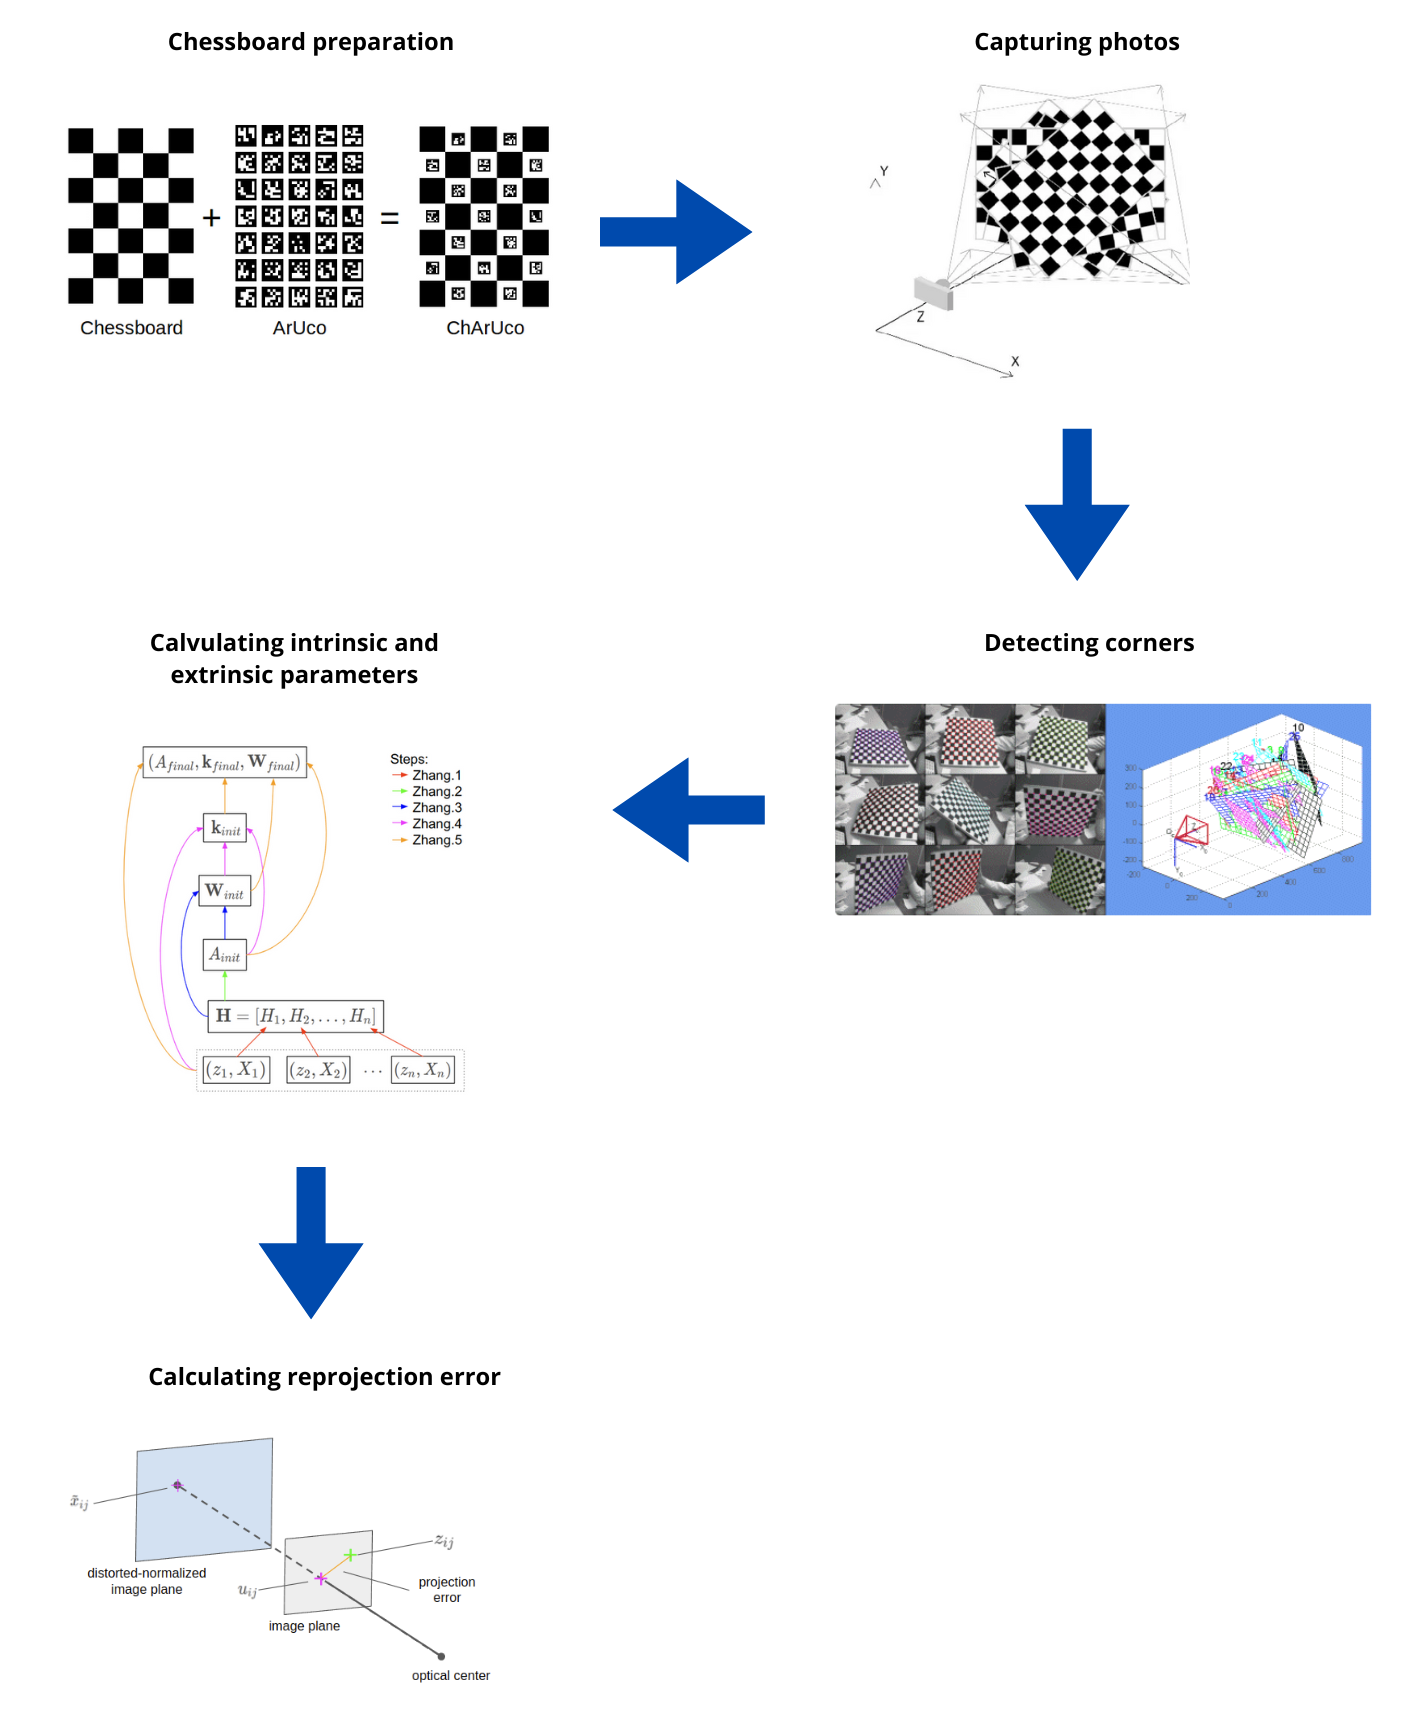

In [12]:
# source: https://farukalamai.medium.com/camera-calibration-explained-enhancing-accuracy-in-computer-vision-applications-8ad1494cc5f2,
#         https://pvphan.com/camera-calibration-1, https://pvphan.com/camera-calibration-2
Image(filename=".././images/2_4.png", width=600)

### Korekcja zniekształceń - skąd się wzięły wzory?

O jakości uzyskanego obrazu decydują również zniekształcenia geometryczne wynikające z wad układu optycznego kamery. Objawiają się w postaci charakterystycznych zakrzywień obrazu, których natężenie wzrasta wraz ze wzrostem odległości punktu od osi optycznej kamery. Występujące deformacje mają głównie postać dystorsji radialnych, czyli zniekształceń poduszkowych lub beczkowych. Rzadziej spotykane są deformacje tangensialne, wynikające z faktu, że soczewka układu optycznego nie jest idealnie równoległa do płaszczyzny obrazu. Dokładnie to zostało przedstawione w notatniku 1_image_distortions. 

Zniekształcenia te mogą być opisane z wykorzystaniem współczynników dystorsji, na podstawie których możliwa jest korekcja współrzędnych danego punktu na obrazie - co można zaobserwować na schemacie jako 3 etap transformacji punktu 3D do 2D. Zniekształcenia te powodują, że nasz punkt docelowy P1 znajduje się w punkcie P2. W idealnym przypadku (po usunięciu zniekształceń) dążymy do tego, aby odległość (r) między punktami była równa 0, czyli punkty występowały w tym samym miejscu. 

W ogólnym przypadku korekcja zniekształceń polega na tym, że najpierw usuwane są zniekształcenia radialne, a następnie tangensialne.

Ale skąd wynikają powyższe wzory?

To są wzory wynikające z modelu zniekształceń - Brown-Conrady distortions model. Jest to rozszerzenie pinhole model i dodatkowo uwzględnia właśnie takie zniekształcenia obrazu.
- zniekształcenia radialne opisują nieliniową zależność między odległością od centrum obrazu a rzeczywistą deformacją soczewki. Biorąc pod uwagę pewne przybliżenie można opisać te zniekszłcenia przez szereg Taylora. Przybliżamy zaczynając od a1 = r = 0, więc dlatego równanie uwzględnia samego r. Dodatkowo brane pod uwagę sa tylko parzyste potęgi, ponieważ funkcja musi być symetryczna.
- zniekształcenia tangensialne (styczne) moga być opisane jako przesunięcie wzdłuż kierunków stycznych do okregu, którego centrum leży w centrum obrazu.  

source: https://mathsfromnothing.au/camera-calibration/?i=2